## EDA stands for Exploratory Data Analysis.

Its a systematic process that helps data scientists understand data sets by identifying patterns, relationships, and anomalies.
EDA is often used as the first step in data analysis.

# What does EDA do?

Helps identify outliers and unexpected features in data
Helps understand how variables are related
Helps design statistical analyses that yield meaningful results
Helps determine if statistical techniques are appropriate
Helps generate hypotheses that may benefit from additional research

# How does EDA work?

Involves generating questions about the data
Involves visualizing, transforming, and modeling the data
Involves using results to refine questions and generate new ones

# Common EDA Steps You Can Learn

✔️ Data Cleaning (handling missing values, duplicates, outliers)

✔️ Data Visualization (matplotlib, seaborn, plotly)

✔️ Feature Engineering (categorical encoding, transformations)

✔️ Descriptive Statistics (df.describe(), df.info(), df.corr())

✔️ Handling Imbalanced Data

✔️ Correlation & Hypothesis Testing

# The dataset consists of 891 rows and 12 columns (in the training dataset). The goal is to analyze the characteristics of passengers and their survival chances.

🛠 EDA Techniques to Apply on Titanic Dataset
Below are different Exploratory Data Analysis (EDA) techniques you can apply step-by-step.

1️⃣ Loading and Understanding the Data
df.head(), df.info(), df.describe()
Checking data types, null values, and basic statistics.

2️⃣ Handling Missing Values
Check missing values: df.isnull().sum()
Drop columns with too many missing values (like Cabin).
Fill missing values (Age can be filled with median, Embarked with mode).

3️⃣ Handling Categorical Variables
Convert Sex to numerical (male = 0, female = 1).
One-hot encoding for Embarked.
Convert Pclass to a categorical variable.

4️⃣ Univariate Analysis (Single Feature Analysis)
Histogram for Age, Fare (using seaborn.histplot())
Bar plots for categorical variables like Pclass, Sex, Embarked (using sns.countplot()) 

5️⃣ Bivariate Analysis (Feature vs. Survival)
Compare survival rates by Sex (sns.barplot(x='Sex', y='Survived', data=df))
Compare survival by Pclass, Age, Fare
Boxplots to check distribution of numerical variables (sns.boxplot(x='Survived', y='Age', data=df))

6️⃣ Correlation Analysis
df.corr() to check correlation between numerical features.
Heatmap (sns.heatmap(df.corr(), annot=True, cmap='coolwarm')).

7️⃣ Feature Engineering
Creating new features like FamilySize = SibSp + Parch + 1
Creating an Age Category feature (child, adult, senior).
Extracting titles from Name (e.g., "Mr", "Mrs", "Miss") for analysis.

8️⃣ Outlier Detection
Use Boxplots to identify outliers in Fare and Age.
Handle outliers using capping or transformation.

9️⃣ Visualization Techniques
Pie charts for gender distribution (plt.pie()).
Pairplots (sns.pairplot(df)) to check relationships.
Violin plots for class-based fare distribution.


In [4]:
# 1️⃣ Loading and Understanding the Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset from Seaborn
df = sns.load_dataset("titanic")

In [8]:
# Display first 5 rows
df.head()  # Shows first 5 rows to get an overview of data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# Check data types and missing values
df.info()  # Shows column data types, non-null counts
# 📌 Observation: 'age', 'embarked', and 'cabin' have missing values.
# 'Pclass' should be categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
# Summary statistics of numerical columns
df.describe()  # Gives count, mean, std, min, max, etc.
# 📌 Observation: The mean age is around 30 years. The fare
#has a wide range with possible outliers.

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Check missing values
df.isnull().sum()  # Shows total missing values per column
# 📌 Observation: 'age' and 'deck' have missing values.


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
# Print rows where 'deck' is missing
missing_age_rows = df[df['deck'].isnull()]
display(missing_age_rows)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


# Handling  missing values

In [ ]:

# Fill missing Age values with median
df['age'].fillna(df['age'].median(), inplace=True)
# 📌 Observation: The missing values in 'age' are now replaced
# with the median.

<ipython-input-8-b939d713d2f8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [21]:
# Verify that 'age' no longer has missing values
display(df[df['age'].isnull()])
# 📌 Observation: No more missing values in 'age'.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [23]:
# Fill missing Embarked values with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 📌 Observation: The most frequent embarkation port is used to fill missing values.

C:\Users\91987\AppData\Local\Temp\ipykernel_12440\1952656312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [27]:
# Handling Missing 'deck' Values
missing_deck_ratio = df['deck'].isnull().sum() / len(df)
print(missing_deck_ratio)
if missing_deck_ratio > 0.5:
    df.drop(columns=['deck'], inplace=True)
     # Drop 'deck' if more than 50% missing
    print("'deck' column dropped due to excessive missing values.")
else:
    df['deck'].fillna('Unknown', inplace=True)
     # Otherwise, fill missing values with 'Unknown'
# 📌 Observation: The 'deck' column had too many missing values and was dropped.

0.7721661054994389
'deck' column dropped due to excessive missing values.


# Handling categorical Variables

In [31]:
# Convert Sex column to numeric: male=0, female=1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
# 📌 Observation: 'sex' is now a numerical variable,
#which makes it easier for analysis.

In [33]:
# One-hot encode Embarked column
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
# 📌 Observation: 'embarked' is now transformed into dummy variables.

In [37]:
'''What is One-Hot Encoding?
It's a technique used to convert
 categorical variables into numeric form by
 creating separate binary (0/1) columns for each unique category.
How it works for 'embarked'?
The embarked column has categorical values like C (Cherbourg),
 Q (Queenstown), and S (Southampton).
pd.get_dummies(df, columns=['embarked'])
creates three new columns: embarked_C, embarked_Q, and embarked_S,
where each row gets 1 in the column

corresponding to its original category and 0 in others.
The drop_first=True parameter removes one of these columns (e.g., embarked_S)
 to avoid dummy variable trap (redundancy in regression models).

Here, embarked_S is dropped
 (because knowing embarked_C and embarked_Q is enough to infer embarked_S).'''

"What is One-Hot Encoding?\nIt's a technique used to convert\n categorical variables into numeric form by\n creating separate binary (0/1) columns for each unique category.\nHow it works for 'embarked'?\nThe embarked column has categorical values like C (Cherbourg),\n Q (Queenstown), and S (Southampton).\npd.get_dummies(df, columns=['embarked'])\ncreates three new columns: embarked_C, embarked_Q, and embarked_S,\nwhere each row gets 1 in the column\n\ncorresponding to its original category and 0 in others.\nThe drop_first=True parameter removes one of these columns (e.g., embarked_S)\n to avoid dummy variable trap (redundancy in regression models).\n\nHere, embarked_S is dropped\n (because knowing embarked_C and embarked_Q is enough to infer embarked_S)."

In [ ]:
# Convert Pclass to categorical
df['pclass'] = df['pclass'].astype('category')
# 📌 Observation: 'pclass' is now a categorical variable.

In [39]:
'''Why Convert pclass to Categorical?
pclass represents categories, not continuous values

The values (1, 2, 3) represent different passenger classes,
not numerical quantities.
Treating them as categorical prevents misleading statistical calculations
 (e.g., averaging them doesn’t make sense).
Optimized Memory Usage

Categorical variables take up less memory compared to integers.
Improved Analysis & Visualization

Some functions, like sns.countplot() or groupby(),
work better with categorical data.
It allows for easier encoding in machine learning models.'''

'Why Convert pclass to Categorical?\npclass represents categories, not continuous values\n\nThe values (1, 2, 3) represent different passenger classes,\nnot numerical quantities.\nTreating them as categorical prevents misleading statistical calculations\n (e.g., averaging them doesn’t make sense).\nOptimized Memory Usage\n\nCategorical variables take up less memory compared to integers.\nImproved Analysis & Visualization\n\nSome functions, like sns.countplot() or groupby(),\nwork better with categorical data.\nIt allows for easier encoding in machine learning models.'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    category
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
 13  embarked_Q   891 non-null    bool    
 14  embarked_S   891 non-null    bool    
dtypes: bool(4), category(2), float64(2), int64(4), object(3)
memory usage: 68.3+ KB


# 4️⃣ Univariate Analysis (Single Feature Analysis)

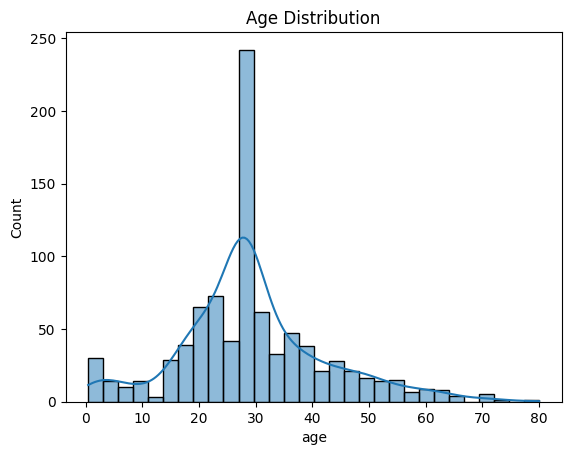

In [ ]:

# Histogram for Age
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()
# 📌 Observation: The distribution of age is slightly right-skewed with most passengers between 20-40 years.

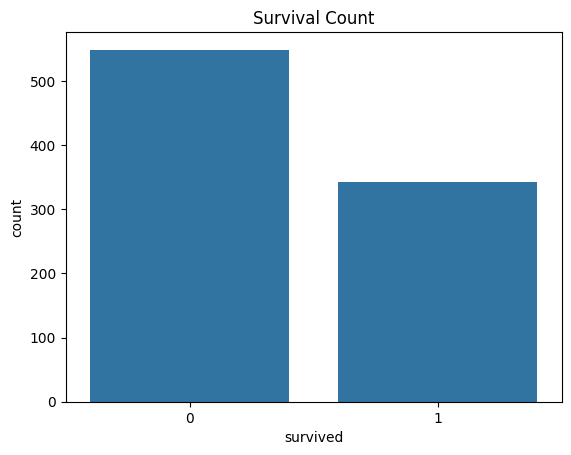

In [ ]:

# Bar plot for Survival Count
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()
# 📌 Observation: More passengers did not survive (0) compared to those who survived (1).


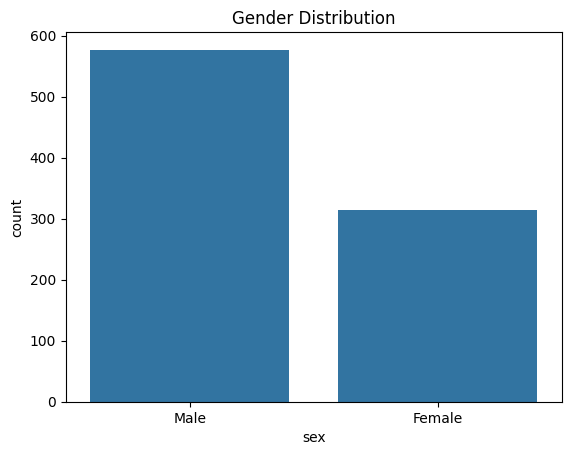

In [ ]:
#Countplot for Sex
data = df.copy()
sns.countplot(x='sex', data=data)
plt.title("Gender Distribution")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()
# 📌 Observation: There were more male passengers than female passengers.

1️⃣ sns.countplot() (Count Plot)
Directly counts the occurrences of each category and displays them as bars.
Does not require an explicit aggregation function.
Used when you want to see how frequently each category appears.

2️⃣ sns.barplot() (Bar Chart)
Requires a numeric value and a categorical variable.
Displays aggregated statistics (default is mean) for each category.
Can be customized with different aggregation functions like sum, median, etc.

# Bivariate Analysis (Feature vs. Survival)

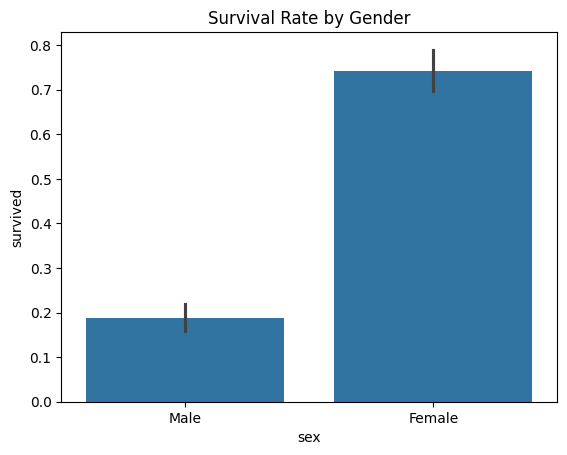

In [ ]:
# Survival Rate by Sex
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()
# 📌 Observation: Female passengers had a much higher survival rate than males.

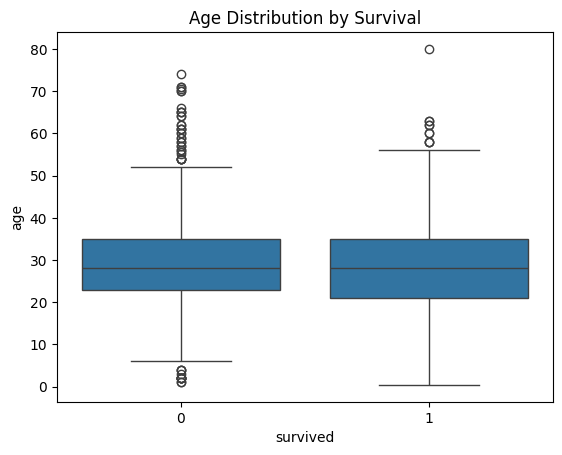

In [ ]:
# Boxplot of Age by Survival
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age Distribution by Survival")
plt.show()
# 📌 Observation: Younger passengers had higher survival rates compared to older ones.

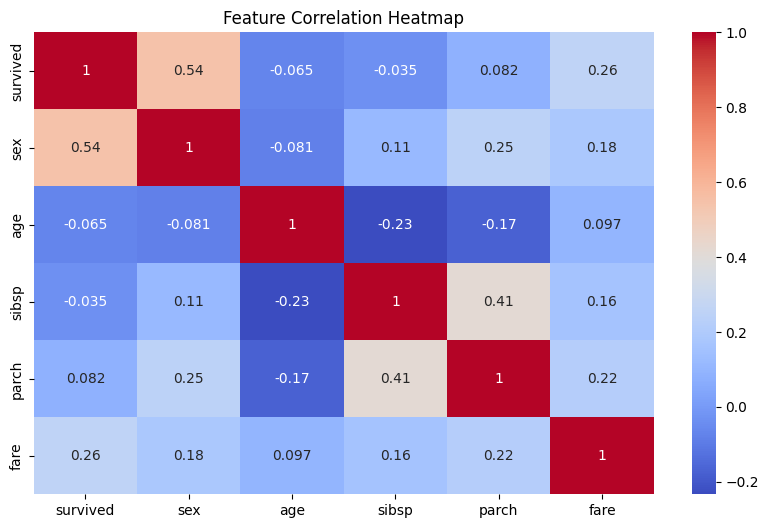

In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df)
# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [2]:
#Feature Engineering
# Create Family Size Feature
df['family_size'] = df['sibsp'] + df['parch'] + 1
# 📌 Observation: Family size is created, which could influence survival chances.

NameError: name 'df' is not defined

In [ ]:
# Create Age Category Feature
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100],
                          labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
# 📌 Observation: Age is now categorized into groups.

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S,family_size,age_group
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,False,True,2,Young Adult
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,False,False,2,Adult
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,False,True,1,Young Adult
3,1,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,False,True,2,Young Adult
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,False,True,1,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,False,True,1,Young Adult
887,1,1,1,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,False,True,1,Young Adult
888,0,3,1,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False,False,True,4,Young Adult
889,1,1,0,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,False,False,1,Young Adult


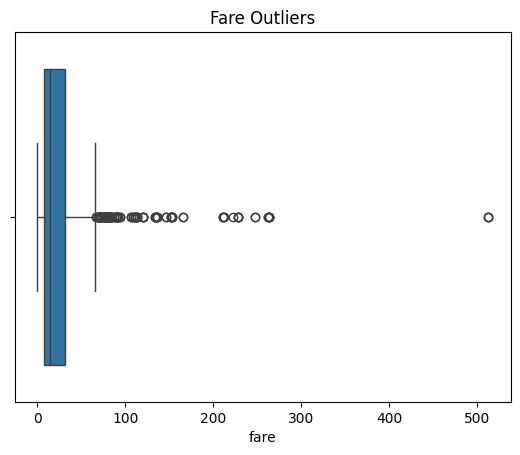

In [ ]:
# Outlier Detection
# Boxplot for Fare
sns.boxplot(x=df['fare'])
plt.title("Fare Outliers")
plt.show()
# 📌 Observation: There are some high outliers in the fare distribution.

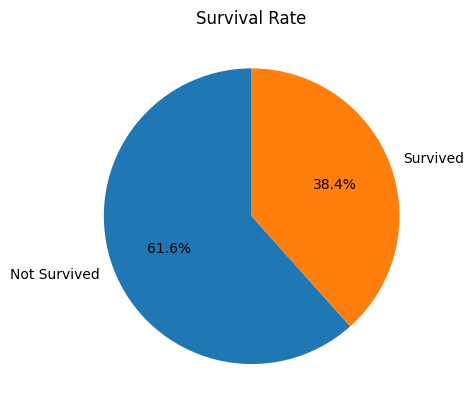

In [ ]:
# Pie Chart for Survival
survived_counts = df['survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title("Survival Rate")
plt.show()
# 📌 Observation: About 38% of passengers survived.

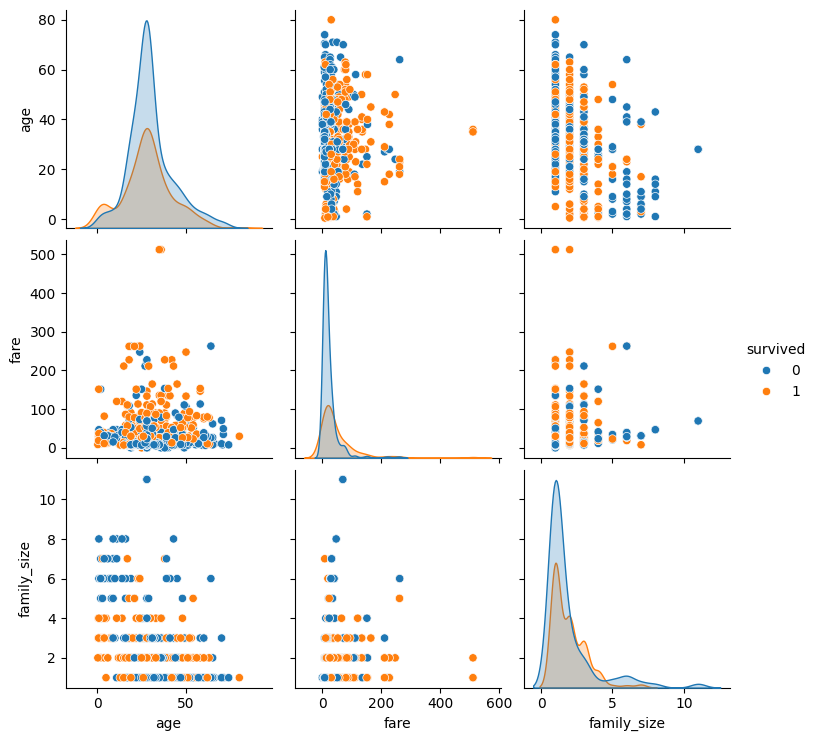


Key Findings:
1️⃣ Women had a higher survival rate than men.
2️⃣ Higher class passengers (Pclass=1) had better survival chances.
3️⃣ Young children had a higher survival rate.
4️⃣ Passengers who embarked from Cherbourg had a higher survival rate.
5️⃣ Fare played a role—higher fares correlated with higher survival chances.


In [ ]:
# Pairplot
sns.pairplot(df[['age', 'fare', 'survived', 'family_size']], hue='survived')
plt.show()
# 📌 Observation: Higher fares and smaller families correlate with higher survival chances.

# ✅ Final Insights
print("\nKey Findings:")
print("1️⃣ Women had a higher survival rate than men.")
print("2️⃣ Higher class passengers (Pclass=1) had better survival chances.")
print("3️⃣ Young children had a higher survival rate.")
print("4️⃣ Passengers who embarked from Cherbourg had a higher survival rate.")
print("5️⃣ Fare played a role—higher fares correlated with higher survival chances.")
